In [18]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [19]:
# stock symbols with aacronyms FAANG
stockSymbols = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
stockSymbols

['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [20]:
#FAANG
stockStartDate = '2017-01-01'

In [21]:
# get todays date format it in the form YY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')
today

'2024-01-30'

In [22]:
def getMyPortfolio(stocks = stockSymbols, start = stockStartDate, end =today, col = 'Close'):
    data = web.DataReader(stocks, data_source = 'stooq', start = start, end = end)[col]
    return data

In [23]:
res = getMyPortfolio(stockSymbols)
res

/var/folders/y7/sycwj7sn0lvc3k9gg0v3vs140000gn/T/ipykernel_1821/2262458392.py:2: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  data = web.DataReader(stocks, data_source = 'stooq', start = start, end = end)[col]


Symbols,AMZN,AAPL,NFLX,GOOG
2017-01-03,37.6835,27.1761,127.49,39.3070
2017-01-04,37.8590,27.1462,129.41,39.3450
2017-01-05,39.0225,27.2867,131.81,39.7015
2017-01-06,39.7995,27.5858,131.07,40.3075
2017-01-09,39.8460,27.8381,130.95,40.3325
...,...,...,...,...
2024-01-23,156.0200,195.1800,492.19,148.6800
2024-01-24,156.8700,194.5000,544.87,150.3500
2024-01-25,157.7500,194.1700,562.00,153.6400
2024-01-26,159.1200,192.4200,570.42,153.7900


In [36]:
# create a function to visualize the portfolio
def showGraph(stocks=stockSymbols, start=stockStartDate, end=today, col='Close'):
    title = 'portfolio' +col+ 'price History'
    mystocks = getMyPortfolio(stocks=stocks, start=start, end=end, col=col)

    #give the figure size
    plt.figure(figsize=(12.2, 4.5))
    for stock in mystocks.columns.values:
        plt.plot(mystocks[stock], label=stock)

    plt.title(title)
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel(col+ 'price usd($)', fontsize = 18)
    plt.legend(mystocks.columns.values, loc = 'upper left')
    plt.show()

/var/folders/y7/sycwj7sn0lvc3k9gg0v3vs140000gn/T/ipykernel_1821/2262458392.py:2: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  data = web.DataReader(stocks, data_source = 'stooq', start = start, end = end)[col]


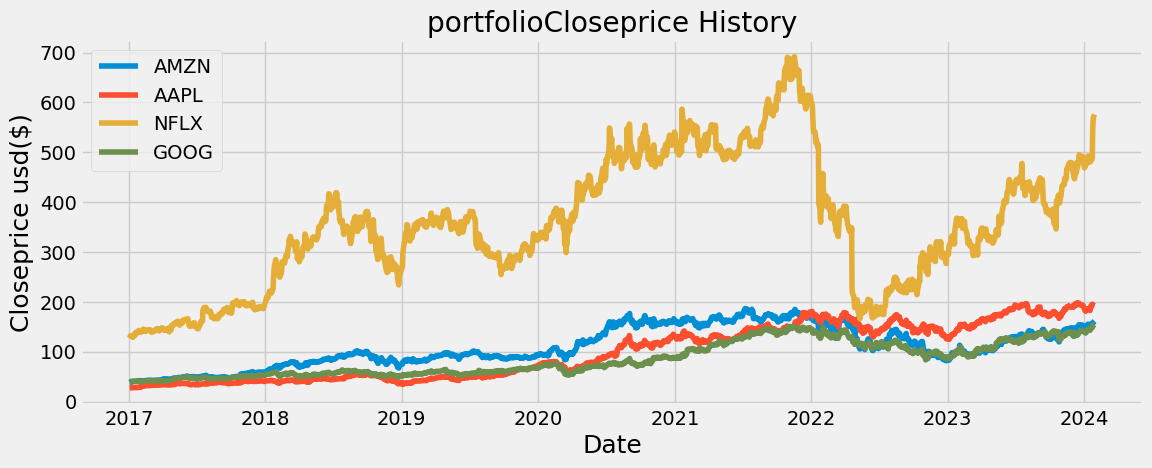

In [37]:
showGraph(stockSymbols)

In [39]:
# calculating daily simple return
daily_simple = res.pct_change()
daily_simple

Symbols,AMZN,AAPL,NFLX,GOOG
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,0.004657,-0.001100,0.015060,0.000967
2017-01-05,0.030732,0.005176,0.018546,0.009061
2017-01-06,0.019912,0.010961,-0.005614,0.015264
2017-01-09,0.001168,0.009146,-0.000916,0.000620
...,...,...,...,...
2024-01-23,0.008011,0.006653,0.013341,0.006567
2024-01-24,0.005448,-0.003484,0.107032,0.011232
2024-01-25,0.005610,-0.001697,0.031439,0.021882
2024-01-26,0.008685,-0.009013,0.014982,0.000976


In [40]:
# show the stock correlation
daily_simple.corr()

Symbols,AMZN,AAPL,NFLX,GOOG
Symbols,,,,
AMZN,1.000000,0.618038,0.570079,0.674885
AAPL,0.618038,1.000000,0.466809,0.665499
NFLX,0.570079,0.466809,1.000000,0.492512
GOOG,0.674885,0.665499,0.492512,1.000000


In [41]:
# show the covariance matrix for simple return.. volatility
daily_simple.cov()

Symbols,AMZN,AAPL,NFLX,GOOG
Symbols,,,,
AMZN,0.000447,0.000247,0.000335,0.000264
AAPL,0.000247,0.000357,0.000245,0.000233
NFLX,0.000335,0.000245,0.000772,0.000253
GOOG,0.000264,0.000233,0.000253,0.000343


In [42]:
# show the variance
daily_simple.var()

Symbols
AMZN    0.000447
AAPL    0.000357
NFLX    0.000772
GOOG    0.000343
dtype: float64

In [43]:
# show the stock volatility standard daviation for daily return
daily_simple.std()

Symbols
AMZN    0.021152
AAPL    0.018903
NFLX    0.027778
GOOG    0.018517
dtype: float64

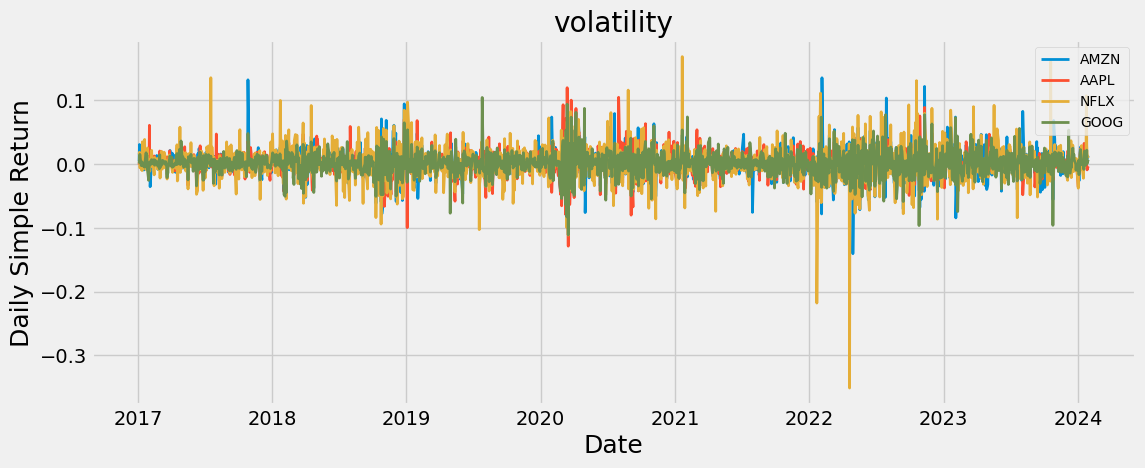

In [44]:
# visualize the stock daily simple return
plt.figure(figsize = (12, 4.5))
for c in daily_simple.columns.values:
    plt.plot(daily_simple.index, daily_simple[c], lw=2, label=c)

plt.title('volatility')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Daily Simple Return', fontsize = 18)
plt.legend(res.columns.values, loc = 'upper right', fontsize = 10)
plt.show()

In [46]:
#show the mean of the daily simple return
dailymean = daily_simple.mean()
dailymean

Symbols
AMZN    0.001041
AAPL    0.001278
NFLX    0.001244
GOOG    0.000943
dtype: float64

In [47]:
# calculate the extended portfolio daily return
randomweights = np.array([0.4, 0.1, 0.3, 0.2]) #40% FB, 10% AMZN, 30% APPL, 10% NFLX, 10% GOOG\
portfolioSimpleReturn = np.sum(dailymean * randomweights)

print('daily expected portfolio return: ' +str(portfolioSimpleReturn))

daily expected portfolio return: 0.0011061756231719104


In [48]:
# calculate the growth of the investment
dailycumReturn = (daily_simple + 1).cumprod()
dailycumReturn

Symbols,AMZN,AAPL,NFLX,GOOG
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,1.004657,0.998900,1.015060,1.000967
2017-01-05,1.035533,1.004070,1.033885,1.010036
2017-01-06,1.056152,1.015076,1.028081,1.025453
2017-01-09,1.057386,1.024360,1.027139,1.026090
...,...,...,...,...
2024-01-23,4.140274,7.182046,3.860617,3.782532
2024-01-24,4.162830,7.157024,4.273825,3.825018
2024-01-25,4.186182,7.144881,4.408189,3.908719
2024-01-26,4.222538,7.080486,4.474233,3.912535


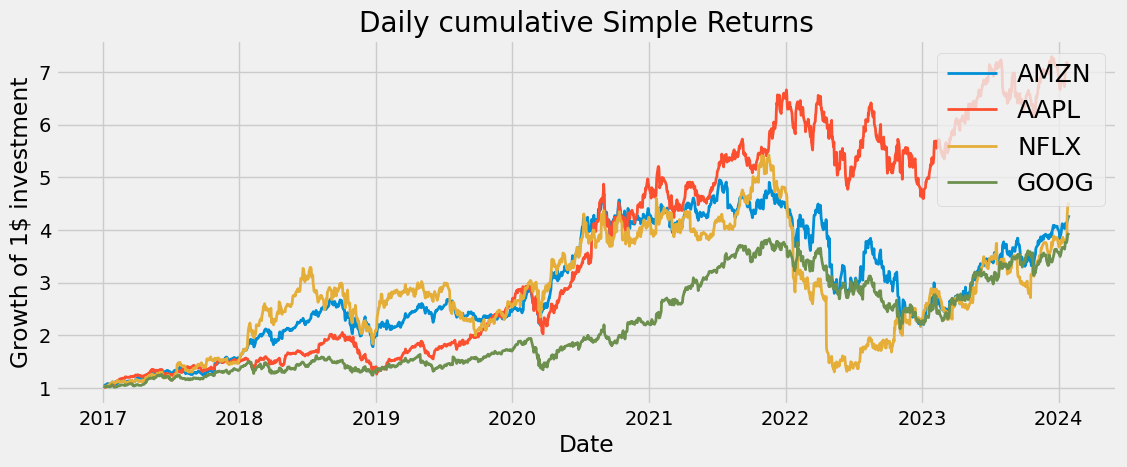

In [49]:
# visualize the daily cumulative returns
plt.figure(figsize=(12.2, 4.5))
for c in dailycumReturn.columns.values:
    plt.plot(dailycumReturn.index, dailycumReturn[c], lw=2, label=c)

plt.legend(loc = 'upper right', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Growth of 1$ investment')
plt.title('Daily cumulative Simple Returns')
plt.show()